## 4.2 라이브러리 및 데이터 불러오기

In [13]:
import pandas as pd

In [14]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

In [15]:
data  = pd.read_csv(file_url)

## 4.3 데이터 확인하기

In [16]:
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [17]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [19]:
# 통계 정보
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [20]:
# 소수점 2째자리까지만 표시해 통계 정보 출력
round(data.describe(), 2)

# 사분위수(Quantile)
# => 데이터를 오름차순으로 정리했을 때 25%, 50%, 75% 위치에서 확인한 값
# => 예를들어 100개의 값들이 있다고 하면 가장 낮은 숫자부터 하나씩 세어 25번째 데이터, 50번째 데이터, 75번째 데이터가 각각 사분위수 25%, 50%, 75%에 해당한다. Q1, Q2, Q3 라고도 표현한다.

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


## 4.4 전처리: 학습셋과 실험셋 나누기

In [21]:
# 데이터 클리닝 : 지저분한 데이터를 정리하는 과정 (결측치 처리, 오탈자 수정, 불필요한 문자 제거)
# 피처 엔지니어링 : 가지고 있는 독립변수들을 활용해서 더욱 풍성하고 유용한 독립변수들을 만들어내는 과정

X = data[['age', 'sex', 'bmi', 'children', 'smoker']] # 독립변수
y = data['charges'] # 종속변수

In [22]:
from sklearn.model_selection import train_test_split # 사이킷런 임포트

# 학습에 사용한 데이터와 평가용으로 사용한 데이터가 동일하다는 것은 모델을 만들고 나서 새로운 데이터에도 맞는지 검증하지 않은 것이나 다름 없다
# => 특정 데이터에 최적화되어서 새로운 데이터에 대한 예측력이 떨어진다.

# 학습셋 & 시험셋 분리
# => 학습된 모델에 있어 시험셋의 데이터는 처음 만나게 되는 데이터인 것
# => 시험셋으로 예측/평가를 했을 때도 예측력이 좋게 나타난다면, 향후 예측하게 될 새로운 데이터에 대해서도 잘 작동할거라는 기대를 가질 수 있다.

In [23]:
# 랜덤 샘플링은 데이터를 특정 비율로 나눌 때 마구잡이로 뒤섞는 것

# train_test_split() 함수는 기존 데이터의 순서와 상관없이 마구잡이로 섞어서 데이터를 분류시킨다.
# => 따라서, 매번 실행할 때마다 train_set과 test_set에 들어가는 데이터가 달라진다.
# => random_state를 사용하면 랜덤하게 샘플링하면서도, 지속적으로 같은 데이터 분류를 지원한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100) # 데이터셋 분할

## 4.5 모델링

In [24]:
# 모델링 : 머신러닝 알고리즘으로 모델을 학습시키는 과정, 그 결과물이 머신러닝 모델이 된다.

# 1. 알고리즘 선택 : 다양한 머신러닝 알고리즘 중 선택 후 라이브러리 임포트
# 2. 모델 생성 : 모델링에 사용할 모델 생성
# 3. 모델 학습 : fit()함수에 학습셋의 독립변수와 종속변수를 인수로 대입

from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
# model.fit(독립변수, 종속변수)
# 학습 과정이므로 학습셋을 사용
# => 학습시킨다 의 의미는, 데이터를 모델 안에 넣어서 독립변수와 종속변수 간의 관게들을 분석해 새로운 데이터를 예측할 수 있는 상태로 만드는 것
# => 이로써 model은 데이터를 통해 학습을 완료해 예측을 할 수 있는 상태가 되는 것
model.fit(X_train, y_train)

LinearRegression()

## 4.6 모델을 활용해 예측하기

In [27]:
# 예측
# 원래 예측 및 평가에서 학습셋과 시험셋을 각각 사용해 오버피팅 문제를 확인하는데, 여기서는 생략
# => 오버피팅(overfitting) : 모델이 학습셋에 지나치게 잘 맞도록 학습되어서 새로운 데이터에 대한 예측력이 떨어지는 현상을 의미 (과적합, 과학습으로도 불린다.)

# 모델을 사용한 예측
# => train_test_split()함수에 평가셋의 독립변수를 인수로 대입
# => 주의할 점은, 여기서 들어가는 데이터에는 목표 변수가 포함되어서는 안 된다. 정답을 알려주는 꼴임. 또한 독립변수 중 하나라도 빠진 나머지 데이터로 예측을 시도한다면 오류 발생
pred = model.predict(X_test)

## 4.7 예측 모델 평가하기

In [28]:
# 테이블로 평가하기
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [29]:
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


In [30]:
import matplotlib.pyplot as plt # ❶
import seaborn as sns # ❷

<AxesSubplot:xlabel='actual', ylabel='pred'>

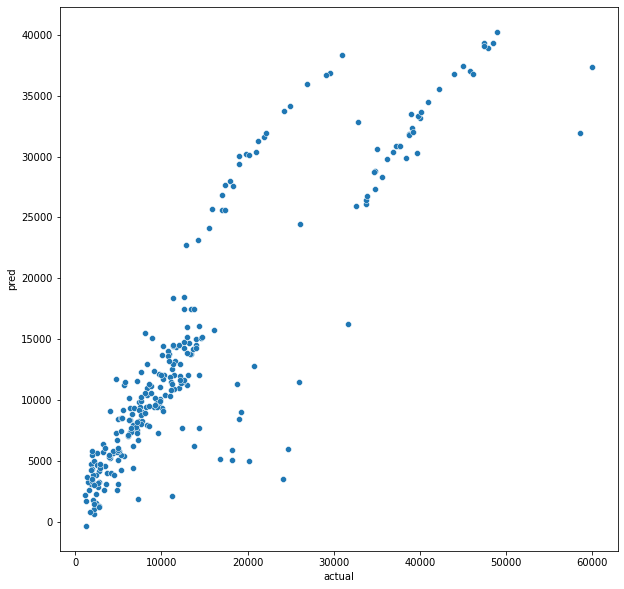

In [31]:
# 그래프로 평가하기
# => 테이블로 일일이 확인할 때보다 평가가 수월
# => 그러나, 직관적으로 예측력을 확인할 뿐이지, 객관적인 기준은 되지 않는다.
plt.figure(figsize=(10,10)) # ❶ 그래프 크기를 정의
sns.scatterplot(x = 'actual', y = 'pred', data = comparison) # ❷ 산점도 그래프 만듦

In [32]:
# 통계적인 방법으로 평가하기 : RMSE
# => 연속형 변수를 예측하고 평가할 때 흔히 사용
# => 쉽게 말해, 실젯값과 예측값 사이의 오차를 각각 합산하는 개념

# MAE(Mean Absolute Error : 평균 절대 오차)
# MSE(Mean Squared Error : 평균 제곱 오차)
# => MSE의 단점 : 제곱으로 인해 그 규모가 실제 데이터의 스케일에 비해 너무 커진다.
# => 이 부분을 해소해주기 위해 MSE에 루트를 씌운 RMSE(Root Mean Squared Error) 를 사용, 이 지표가 연속형 변수를 예측할 때 가장 일반적으로 쓰임

# MAE, MSE, RMSE 모두 0에 가까울수록 좋은 지표이다. => 에러에 대한 합을 계산한 것이기 때문에 작을수록 예측력이 좋다

from sklearn.metrics import mean_squared_error # ❶ MSE 라이브러리 임포트
mean_squared_error(y_test, pred) ** 0.5 # ❷ RMSE 계산 실행 (** 0.5 : 루트)

5684.927776334485

In [33]:
# MSE 함수 안에서 squared 매개변수를 False로 설정하면 RMSE를 구할 수 있다.
# RMSE를 평가하는 절대적인 기준은 없다. 상대 평가임.
# => 같은 데이터에 여러 가지 모델링을 해보고, 그중 어떤 모델이 가장 뛰어난 예측력을 보이는지를 판단할 때 RMSE가 가장 낮은 모델을 선택하면 된다.
mean_squared_error(y_test, pred, squared = False)

5684.927776334485

## R Squared
- 즉, 대충 평균값으로 넣었을 때, 예측값(평균값)과 실제값의 차이 중 우리 모델이 얼마만큼의 비율로 실젯값에 가깝게 예측하는지를 의미한다.
- 결정 계수, 독립변수가 종속변수를 얼마만큼 설명해 주는지를 가리키는 지표로, 즉 설명력을 나타냄. 값이 1에 가까울수록 좋은 지표이다.
- 독립변수로 설명되는 종속 변수의 분산 비율을 나타내는 통계적 측정값
- SST(Sum of Squares Total) : 종속변수 y의 평균값 점선으로부터 관측치까지의 차이
- SSR(Sum of Squares Regression) : 특정 데이터의 x값을 기준으로 종속변수 y의 평균값의 점선부터 선형 회귀 모델 실선까지의 거리
  - 즉, 평균으로 대충 때려 맞추었을 때와, 우리가 만든 모델을 이용했을 때의 차이
- SSE(Sum of Squares Error) : 선형 회귀 모델의 실선과 실제 데이터까지의 거리
  - 우리가 만든 모델이 예측해내지 못한 에러를 나타낸다.
- R Squared는 SST에서 SSR이 차지하는 바율

In [34]:
# R Squared의 비율이므로 최대 1까지 나올 수 있다.
# 좋은 모델일수록 1에 가깝고 0.7~0.8이상이면 일반적으로 괜찮은 수치
model.score(X_train, y_train)

0.7368220127747351

## 4.8 이해하기 : 선형 회귀 (Linear Regression)

## 선형 회귀 (Linear Regression)
- 독립변수와 종속변수 간에 선형 관계가 있음을 가정하여 최적의 선을 그려서 예측하는 방법
- 흔히 선형 관계가 있을 것이라 예측할 만한 예로 키와 체중을 들 수 있다.
  - 같은 키라도 사람마다 체중은 천차만별이겠지만, 평균적으로 키가 크면 큰만큼 평균 체중 또한 더 많이 나갈 것.
- 머신러닝에서는 손실 함수(Loss Function)를 최소화하는 선을 찾아서 모델을 만들어낸다.
  - 손실 함수란 예측값과 실제값의 차이, 즉 오차를 평가하는 방법
  - 그래프에서 선과 각 점 간의 거리가 오차가 되고, 앞서 배웠던 MSE나 RMSE 등이 손실 함수가 된다.
  - 예측한 선의 기울기나 y절편에 따라서 실제값과 예측값의 차이가 달라진다.

In [35]:
# 독립변수 5개에 대한 계수 (각 독립변수에 대한 기울기 값)
# 청구비용 = (A x age) + (B x sex) + (C x bmi) + (D x children) + (E x smoker) + i
model.coef_
# => 넘파이 형태로 출력되기 때문에, 변수의 이름이 따로 나타나지 않는데, 기존 데이터의 독립변수와 같은 순서로 배열되어 있다.

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [36]:
# 보기편하도록 판다스 형태로 변경
pd.Series(model.coef_, index = X.columns)

# age가 1만큼 증가하면 charges는 약 265만큼 증가
# sex는 0과 1로만 구성된 데이터이기 때문에 "1만큼 증가할 때 charges가 17만큼 증가한다" 보다는, "남자(1)의 경우 여자(0)보다 charges가 보통 17정도 높다"고 해석하는 게 좋다.
# => smoker도 sex와 마찬가지로 해석

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [37]:
# 학습된 모델은 계수뿐만 아니라 y절편 또한 제공해준다.
model.intercept_

# charges = (264.799803 x age) + (17.344661 x sex) + (297.514806 x bmi) + (469.339602 x children) + (23469.280173 x smoker) - 11576.999976112367
# => 데이터의 특정 행을 정해서 각 변수의 값을 수식에 넣으면 모델이 보여주는 예측값과 같은 결과를 얻을 수 있다. 이처럼 선형 회귀는 수식을 도출하기 쉽기 때문에, 그 해석도 매우 직관적이라는 장점이 있다.

-11576.99997611237

## 학습 마무리
### 보험 데이터셋을 이용하여 보험사에서 청구할 보험료를 예측하는 모델

1. 문제 정의 : 성별 나이 등의 정보를 활용하여 보험 청구비용을 예측
2. 라이브러리 및 데이터 불러오기 : 판다스와 프로젝트에 쓸 예제 데이터셋을 불러옴
3. 데이터 확인 : 데이터를 확인하는 다양한 방법을 확인. 결측치 등 특이사항은 없었다
4. 전처리(학습셋과 실험셋 나누기) : 지도 학습이므로 평가에 사용할 데이터를 학습셋과 시험셋으로 나누었음
5. 데이터 모델링 : 선형 회귀 모델을 사용하여 예측 모델을 만듦
6. 모델을 활용해 예측하기 : 시험셋에 대한 예측값을 얻음
7. 예측 모델 평가하기 : 산점도와 테이블을 사용해 직관적으로 결과를 살펴보고, RMSE와 R Square값도 알아보았다. R Square는 약 0.74로 괜찮은 모델이라고 볼 수 있다.



- 모델의 계수를 해석할 때, 부호의 영향에 유의
- 부호와 상관없이 계수의 절댓값이 클수록 영향이 크다고 할 수 있다. 절댓값이 0에 가까울수록 영향력이 거의 없는 것
  - 다만, 여러 계수를 서로 비교할 때 단순히 절댓값이 더 크면 영향력이 더 크다고 보기에는 무리가 있다. 이유는 각 변수의 스케일이 다르기 때문
  - 이 부분을 명료하게 비교하려면 스케일링 작업이 필요하며, 이는 K-최근접 이웃(KNN)에서 다룰 것